In [1]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [ ]:
%config InlineBackend.figure_format = 'retina'   ##QUALITY FIGURES!!

## Degrees in Telecommunication Engineering, group 95M
## Modern Theory of Detection and Estimation
### Fall 2022

&nbsp;
&nbsp;
&nbsp;
# Non-linear Regression with Machine Learning
&nbsp;
&nbsp;
&nbsp;

**Emilio Parrado Hernández**

Dept. of Signal Processing and Communications

&nbsp;
&nbsp;
&nbsp;




<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />



# Review of regression 

## Regression general scenario

- Given a **collection** of $N$ **example pairs input/output** $\{(x_i, y_i)\}_{i=1}^N$, learn a **mathematical function** that **maps inputs into outputs**.

    $$
    f:x\longrightarrow f(x)
    $$ such that $f(x)$ is a good approximation of the target $y$ that corresponds to $x$.

- **Inference:** use the learnt map to **estimate** the corresponding **target** for new data (**test inputs**)

- Assess the goodness of the function in terms of the quality of the estimations with test data

### Example: the height-foot problem 

In each pair $x_i$ is the height of a person in cm and $y_i$ the length of this person's left foot in cm.

In [ ]:
y_train = np.array([21.21843318, 20.77603687, 20.99723502, 21.30691244, 22.21382488,
       23.27557604, 23.85069124, 24.55852535, 24.04976959, 23.71797235,
       25.02304147, 25.97419355, 25.92995392, 24.71336406, 22.6562212 ,
       22.58986175, 23.27557604, 24.95668203, 26.06267281, 25.37695853,
       25.59815668, 21.68294931, 19.95760369, 18.96221198, 19.51520737])
x_train = np.array([154.9495614 , 153.85307018, 156.59429825, 160.98026316,
       159.44517544, 156.59429825, 160.54166667, 166.35307018,
       166.57236842, 168.98464912, 173.6995614 , 173.6995614 ,
       167.66885965, 165.25657895, 159.99342105, 152.86622807,
       175.01535088, 175.01535088, 175.125     , 170.08114035,
       156.81359649, 158.67763158, 158.89692982, 152.20833333,
       159.99342105])
x_test = np.array([152, 165, 170])
y_test = np.array([16, 19, 22.5])

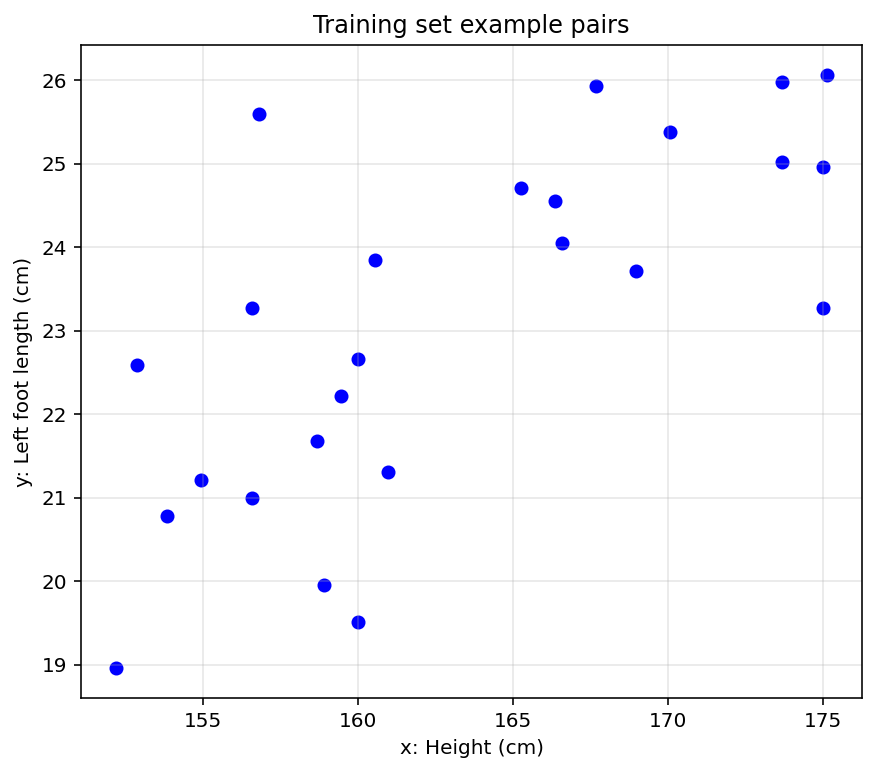

In [ ]:
ff,aa = plt.subplots(1,1,figsize=(7,6))
aa.scatter(x_train, y_train, marker='o', color='blue', label='training set')
aa.set_xlabel('x: Height (cm)')
aa.set_ylabel('y: Left foot length (cm)')
aa.set_title('Training set example pairs')
aa.grid(alpha=0.3)

## Finding a model $f()$ with a regression technique


We **assume** there exists a mapping 
$$
y = f(\mathbf x)
$$

and our task is to find the **function** $f()$ using a training dataset. 


### Follow these steps:
1. Choose a **family** of models. These models are usually parametric. 
2. Choose a **criterion** to decide which member of the family of models serves best as a solution to your regression problem. This criterion is a **loss function**.
3. Solve an optimization problem that finds the best **set of parameters**, that is, the best member of the family of models in the sense that minimizes the **loss function**.

### Linear regression 1D case
1. The model is linear in the inputs
$$
f(x) = w_0 + w_1x
$$

2. Average square error penalty
$$
J(w_0, w_1) = \frac{1}{N}\sum_{i=1}^N(y_i - (w_0+w_1x_i))^2
$$

3. Problem to optimize 
$$
\min_{w_0,w_1}\frac{1}{N}\sum_{i=1}^N(y_i - (w_0+w_1x_i))^2
$$

4. Solution: Pseudoinverse


$$
\mathbf w =\left[ \begin{array}{c} w_0 \\ w_1\end{array} \right] = (X^\top X)^{-1} X^\top \mathbf y
$$ where

$$
X = \left[ \begin{array}{cc} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_N\end{array} \right]_{N\times 2} \mbox{ and } \left[ \begin{array}{c} y_1 \\ y_2 \\ \vdots  \\ y_N\end{array} \right]_{N\times 1}
$$

5. Inference: predict the target that corresponds to a test observation $ x_t$
$$
\hat y_t = \left [\begin{array}{cc} 1 &  x_t \end{array} \right] \mathbf w
$$

### Linear regression 1D case with regularization
1. The model is linear in the inputs
$$
f(x) = w_0 + w_1x
$$

2. Average square error penalty
$$
J(w_0, w_1) = \frac{1}{N}\sum_{i=1}^N(y_i - (w_0+w_1x_i))^2
$$

3. Problem to optimize 
$$
\min_{w_0,w_1}\frac{1}{N}\sum_{i=1}^N(y_i - (w_0+w_1x_i))^2 + \lambda (w_0^2 + w_1^2)
$$

4. Solution: Pseudoinverse


$$
\mathbf w =\left[ \begin{array}{c} w_0 \\ w_1\end{array} \right] = (X^\top X + \lambda N \mathbb I)^{-1} X^\top \mathbf y
$$ where $\lambda$ is a parameter and $\mathbb I$ is the identity matrix

5. Inference: predict the target that corresponds to a test observation $ x_t$
$$
\hat y_t = \left [\begin{array}{cc} 1 &  x_t \end{array} \right] \mathbf w
$$

### Linear regression multivariate case with regularization
1. The model is linear in the inputs (now the input has $d$ dimensions)
$$
f(\mathbf x) = w_0 + \mathbf w^\top \mathbf x
$$

2. Average square error penalty
$$
J(w_0, \mathbf w) = \frac{1}{N}\sum_{i=1}^N(y_i - (w_0+\mathbf w^\top \mathbf x_i))^2
$$

3. Problem to optimize. Include the bias term $w_0$ in the vector $\mathbf w$ and add a $1$ as component to the input:
    - $\mathbf w \rightarrow [w_0 \quad \mathbf w^\top]^\top$
    - $\mathbf x \rightarrow [1 \quad \mathbf x^\top]^\top$
     
$$
\min_{\mathbf w}\frac{1}{N}\sum_{i=1}^N(y_i - \mathbf w^\top \mathbf x_i))^2 + \lambda \mathbf w^\top \mathbf w
$$

4. Solution: Pseudoinverse


$$
\mathbf w = (X^\top X + \lambda N \mathbb I)^{-1} X^\top \mathbf y
$$ 

where 

$$
X = \left[ \begin{array}{cc} 1 & \mathbf x_1^\top \\ 1 & \mathbf x_2^\top \\ \vdots & \vdots \\ 1 & \mathbf x_N^\top \end{array}  \right]
$$

5. Inference: predict the target that corresponds to a test observation $\mathbf x_t$
$$
\hat y_t = \left [\begin{array}{cc} 1 &  \mathbf x_t^\top \end{array} \right] \mathbf w
$$

### Semi-linear regression 1D case with regularization, with explicitely known non-linear mapping

1. The model is non-linear in the inputs
$$
f(x) = \mathbf w^\top \mathbf g(x)
$$

where $\mathbf g$ is a vector function with $m$ nonlinear components, each of them a function of $x$:
$$
\mathbf g(x) = \left [ \begin{array}{c} 1\\g_1(x) \\ g_2(x) \\ \vdots \\ g_m(x) \end{array}\right ]
$$
2. Average square error penalty
$$
J(\mathbf w) = \frac{1}{N}\sum_{i=1}^N(y_i - \mathbf w^\top \mathbf g(x_i))^2
$$

3. Problem to optimize 
$$
\min_{\mathbf w}\frac{1}{N}\sum_{i=1}^N(y_i - \mathbf w^\top \mathbf g(x_i))^2 + \lambda \mathbf w^\top \mathbf w
$$

4. Solution: Pseudoinverse


$$
\mathbf w =\left[ \begin{array}{c} w_0 \\ w_1\end{array} \right] = (H^\top H + \lambda N \mathbb I)^{-1} H^\top \mathbf y
$$ where 
$$
H = \left[ \begin{array}{c} \mathbf g(x_1)^\top \\ \mathbf g(x_2)^\top \\  \vdots \\ \mathbf g(x_N)^\top \end{array}  \right]
$$


5. Inference: predict the target that corresponds to a test observation $ x_t$
$$
\hat y_t = \mathbf g(x_t)^\top \mathbf w
$$

# Semi-linear multivariate regression

Extend the nonlinear features to products of some of the original columns to construct a polynomial function of the original features.

In scikit learn we can leverage in module [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to construct the columns with these features

## Example of problem constructed as a polynomial function of multivariate data

Consider a generic data set with observations in 3 dimensions (3 columns)

In [ ]:
n_train = 100
n_test = 500
dim = 3

# create data with 100 observations in dim dimensions
X_train = np.random.randn(n_train, dim)
X_test = np.random.randn(n_test, dim)

df_train = pd.DataFrame(X_train, columns=['F1','F2','F3'])
df_test = pd.DataFrame(X_test, columns=['F1','F2','F3'])
print("Five observations of the training set")
df_train.head()

Five observations of the training set


,F1,F2,F3
0,0.832534,0.192543,0.472776
1,0.556436,0.560106,0.191642
2,-0.506878,-0.014857,0.789070
3,0.234522,2.220655,0.771639
4,-0.385650,-1.209705,0.438665


Now target obtained through a **polynomial function of the input features**

$$
y(\mathbf x) = 3 + \mbox{F1} - 0.5\cdot\mbox{F2} + 0.5\cdot\mbox{F1}\cdot\mbox{F3} - \mbox{F2}^2
$$

In [ ]:
# python code to create y_train and y_test

def get_y(X):
    sigma_noise = np.mean(np.std(X,0))/10
    n=X.shape[0]
    ww = np.array([3, 1, -.5, .5, -1])
    Xe = np.vstack((np.ones(n), X[:,0], X[:,1], X[:,0]*X[:,2], X[:,1]**2)).T
    return Xe.dot(ww) + np.random.normal(size=n)*sigma_noise

y_train = get_y(X_train)
y_test = get_y(X_test)

Scikit learn offers module `PolynomialFeatures` to create the polynomial expansion of the columns up to a certain degree

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
degree = 2
poly = PolynomialFeatures(degree)
Xp_train = poly.fit_transform(X_train)
Xp_test = poly.transform(X_test)
poly_feat_names = list(poly.get_feature_names_out(df_train.columns))

We use `pandas` for visualization purposes

In [ ]:
df_train_p = pd.DataFrame(Xp_train, columns=poly_feat_names)
df_train_p.head()

,1,F1,F2,F3,F1^2,F1 F2,F1 F3,F2^2,F2 F3,F3^2
0,1.0,0.832534,0.192543,0.472776,0.693114,0.160299,0.393603,0.037073,0.091030,0.223518
1,1.0,0.556436,0.560106,0.191642,0.309621,0.311663,0.106637,0.313719,0.107340,0.036727
2,1.0,-0.506878,-0.014857,0.789070,0.256925,0.007531,-0.399962,0.000221,-0.011723,0.622632
3,1.0,0.234522,2.220655,0.771639,0.055001,0.520794,0.180967,4.931309,1.713543,0.595426
4,1.0,-0.385650,-1.209705,0.438665,0.148726,0.466523,-0.169171,1.463387,-0.530656,0.192427


Now we can use `LinearRegression` (or `Ridge`, or `Lasso`) to find out the regression model in the new feature space determined by the polynomial expansion of the columns.

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# first we try a linear model in input space as baseline
LR = LinearRegression(fit_intercept=True).fit(X_train, y_train)
print("Score of the linear model in input space: {0:.3f}".format(LR.score(X_test, y_test)))
print("")

# then a linear model in feature space

LRp = LinearRegression(fit_intercept=False).fit(Xp_train, y_train)
print("Score of the linear model in feature space: {0:.3f}".format(LRp.score(Xp_test, y_test)))
print("")

Score of the linear model in input space: 0.444

Score of the linear model in feature space: 0.997



We can retrieve the weight vector of the model in feature space, as well as the intercept term ($w_0$)

In [ ]:
model = pd.DataFrame(LRp.coef_.T, index=poly_feat_names, columns=['w'])
display(model)

,w
1,2.982607
F1,1.000309
F2,-0.489996
F3,0.025415
F1^2,-0.006706
F1 F2,-0.001466
F1 F3,0.506199
F2^2,-0.996699
F2 F3,-0.000069
F3^2,0.010570


In [ ]:
LRp = Lasso(alpha=.05,fit_intercept=False).fit(Xp_train, y_train)
print("Score of the linear model in feature space: {0:.3f}".format(LRp.score(Xp_test, y_test)))
print("")
model = pd.DataFrame(LRp.coef_.T, index=poly_feat_names, columns=['w'])
display(model)

Score of the linear model in feature space: 0.991



,w
1,2.847313
F1,0.966407
F2,-0.450993
F3,-0.000000
F1^2,0.000000
F1 F2,-0.000000
F1 F3,0.442889
F2^2,-0.933981
F2 F3,-0.000000
F3^2,0.011525


# Kernel Regression

To find a proper nonlinear set of features for a semilinear model is usually unpractical.

There is a mathematical shortcut called **kernel trick** that can help overcome this difficulty in the application of nonlinear methods by **replacing the dessign of an appropriate nonlinear mapping with the selection of a kernel function** from a collection of usual kernels.


## Kernel functions

In essence a *kernel function* is a function with two input arguments (usually two vectors) that can be understood as an scalar product. Therefore a function to be considered a valid kernel **must satisfy**

1. **Symmetry:**

$$
\kappa(\mathbf x_i,\mathbf x_j) =  \kappa(\mathbf x_j,\mathbf x_i)
$$


3. **Positive Semidefiniteness:** Given a set of vectors $\left \{\mathbf x_i\right \}_{i=1}^n$, one construct its **Gram Matrix** $K$ with all the possible pairwise evaluations of the kernel function on pairs of members of the set:
$$
K = \left [ \begin{array}{cccc} \kappa(\mathbf x_1,\mathbf x_1) & \kappa(\mathbf x_1,\mathbf x_2) & \cdots & \kappa(\mathbf x_1,\mathbf x_n) \\ \kappa(\mathbf x_2,\mathbf x_1) & \kappa(\mathbf x_2,\mathbf x_2) & \cdots & \kappa(\mathbf x_2,\mathbf x_n) \\ \vdots & \vdots & \ddots \vdots \\ \kappa(\mathbf x_n,\mathbf x_1) & \kappa(\mathbf x_n,\mathbf x_2) & \cdots & \kappa(\mathbf x_n,\mathbf x_n) \end{array}\right ]
$$

    Matrix $K$ **must be positive semidefinite** for any set of vectors $\left \{\mathbf x_i\right \}_{i=1}^n$ you could come up with:
    
$$
\mathbf w^\top K \mathbf w \ge 0
$$  for all $\mathbf w \in \mathbb R^n$

### Examples of kernel functions

- **Linear Kernel**: 
$$ \kappa(\mathbf x_1, \mathbf x_2) = \mathbf x_1^\top \mathbf x_2$$

- **Radial Basis Function** (RBF):
$$\kappa(\mathbf x_1, \mathbf x_2) = \exp\{-\gamma\|\mathbf x_1 - \mathbf x_2\|^2\}$$ where $\gamma$ is a parameter that  determines the spread of the RBF 

- **Polynomial Kernel**: 
$$\kappa(\mathbf x_1, \mathbf x_2) = (\mathbf x_1^\top \mathbf x_2 + c)^d $$ where $d$ is the degree of the polynomial and  $c$ is the constant term

- We can construct kernels by the application of an exponential function to any given distance

- The combinations (sums, products) of kernels are also kernels. Given two kernels $\kappa_1(\mathbf u, \mathbf v)$ y $\kappa_2(\mathbf u, \mathbf v)$:
    - $\kappa_s (\mathbf u, \mathbf v) = \kappa_1(\mathbf u, \mathbf v) + \kappa_2(\mathbf u, \mathbf v)$ is also a kernel
    - $\kappa_p (\mathbf u, \mathbf v) = \kappa_1(\mathbf u, \mathbf v) \times \kappa_2(\mathbf u, \mathbf v)$ is also a kernel

## The kernel Trick itself

There is a mathematical result that relates kernel functions with nonlinear mappings into feature spaces. This result states that the application of a **kernel function** to two input vectors $\kappa(\mathbf x_i,\mathbf x_j)$ **is equivalent to**:
1. map the first argument $\mathbf x_i$ onto a high dimension space $\mathcal F$ with a nonlinear mapping $\mathbf h(\mathbf x_i)$. Let's name $\mathbf h_i$ to the vector in $\mathcal F$ resulting from the application of the mapping $\mathbf h()$ to the input vector $\mathbf x_i$ 

2. map the second argument $\mathbf x_j$ onto the same high dimension space $\mathcal F$ with the same nonlinear mapping $\mathbf h(\mathbf x_j)$. Let's name $\mathbf h_j$ to the vector in $\mathcal F$ resulting from the application of the mapping $\mathbf h()$ to the input vector $\mathbf x_j$

3. compute the scalar product between  $\mathbf h_i$ and  $\mathbf h_j$. Therefore
$$
\kappa(\mathbf x_i,\mathbf x_j) = \mathbf h_i^\top\mathbf h_j
$$

## Non linear mapping linked to a kernel

Let us assume there is a nonlinear mapping $\mathbf h(x)$ induced by a kernel $\kappa$ (that is, each kernel is linked to a mapping and vice versa). 

$$
\mathbf h(x_i)^\top \mathbf h(x_j) = \kappa(x_i, x_j)
$$

We consider the data is mapped onto a certain feature space $\mathcal H$ with the mapping $\mathbf h$ and then we apply linear regression in $\mathcal H$.

## Linear regression in $\mathcal H$

Now the data matrix is $H$ instead of $X$. $H$ is a matrix with $n$ rows, one per each training data. The $i$-th row of $H$ is the mapped input data $\mathbf h(\mathbf x_i)^\top =\mathbf h_i $.

$$
\hat y = \mathbf h^\top \mathbf v + v_0
$$


Therefore the solution $\mathbf v \in \mathcal H$ can be obtained from
$$
- 2   H^\top \mathbf y+ 2 H^\top H\mathbf v = 0 
$$

Solving for $\mathbf v$:

$$
\mathbf v = (H^\top H)^{-1}H^\top \mathbf y
$$

Notice $\mathbf v \in \mathcal H$



### Dual formulation


Now we **show** that the solution to the linear regression problem in **Feature Space** can be written as a **linear combination** of the **mapped inputs**.

$$
\mathbf v = \sum_{i=1}^N{\beta_i\mathbf h(\mathbf x_i)}
$$

where $\{\beta_i\}_{i=1}^N$ are the coefficients of the linear combination (also called **dual coefficients**).

In matrix form

$$
\mathbf v = H^\top \boldsymbol \beta
$$

where $\boldsymbol \beta$ is a $N$ dimensional vector with the $\{\beta_i\}_{i=1}^N$.


To show this, we go back to the equation that defines $\mathbf v$ and replace $\mathbf v = H^\top \boldsymbol \beta$


$$
\mathbf v = (H^\top H)^{-1}H^\top \mathbf y \Rightarrow
$$

$$
H^\top \boldsymbol \beta = (H^\top H)^{-1}H^\top \mathbf y \Rightarrow
$$

$$
(H^\top H)H^\top \boldsymbol \beta = H^\top \mathbf y \Rightarrow
$$

premultiplication by $H$
$$
(HH^\top) (HH^\top) \boldsymbol \beta = (HH^\top) \mathbf y \Rightarrow
$$

premultiplication by $(HH^\top) ^{-1}$

$$
(HH^\top) \boldsymbol \beta =  \mathbf y \Rightarrow
$$

solving for $\boldsymbol \beta$

$$
 \boldsymbol \beta =  (HH^\top)^{-1}\mathbf y 
$$

This statement only holds if $(HH^\top)$ is invertible.



### Kernel matrix

Matrix $(HH^\top)$ has the following structure

$$
HH^\top = \left [ \begin{array}{c} \mathbf h (\mathbf x_1)^\top \\ \mathbf h (\mathbf x_2)^\top \\ \vdots \\ \mathbf h (\mathbf x_N)^\top \end{array}\right ] \left [ \begin{array}{cccc} \mathbf h (\mathbf x_1) & \mathbf h (\mathbf x_2) & \cdots & \mathbf h (\mathbf x_N) \end{array}\right ] 
$$

$$
=\left [ \begin{array}{cccc} \mathbf h (\mathbf x_1)^\top \mathbf h (\mathbf x_1) & \mathbf h (\mathbf x_1)^\top \mathbf h (\mathbf x_2) & \cdots & \mathbf h (\mathbf x_1)^\top \mathbf h (\mathbf x_N) \\ \mathbf h (\mathbf x_2)^\top \mathbf h (\mathbf x_1) & \mathbf h (\mathbf x_2)^\top \mathbf h (\mathbf x_2) & \cdots & \mathbf h (\mathbf x_2)^\top \mathbf h (\mathbf x_N) \\ \vdots & \vdots & \ddots & \vdots \\ \mathbf h (\mathbf x_N)^\top \mathbf h (\mathbf x_1)& \mathbf h (\mathbf x_N)^\top \mathbf h (\mathbf x_2) & \cdots & \mathbf h (\mathbf x_N)^\top \mathbf h (\mathbf x_N)\end{array}\right ] 
$$

the **kernel trick** enables the replacing dot products in feature space by kernel evaluations in input space

$$
=\left [ \begin{array}{cccc} \kappa(\mathbf x_1,\mathbf x_1) & \kappa(\mathbf x_1,\mathbf x_2) & \cdots & \kappa(\mathbf x_1,\mathbf x_N) \\ \kappa(\mathbf x_2,\mathbf x_1) & \kappa(\mathbf x_2,\mathbf x_2) & \cdots & \kappa(\mathbf x_2,\mathbf x_N) \\ \vdots & \vdots & \ddots & \vdots \\ \kappa(\mathbf x_N,\mathbf x_1) & \kappa(\mathbf x_N,\mathbf x_2) & \cdots & \kappa(\mathbf x_N,\mathbf x_N) \end{array}\right ] = K
$$



## Now consider  $H$ exists but it is unkown

We still can obtain a regression model without explicitely knowing $H$. Instead we build on the knowledge of the kernel function.

Remember we had to solve 
$$
- 2   H^\top \mathbf y+ 2 H^\top H\mathbf v = 0 
$$

to find the regressor in $\mathcal H$


Replace $\mathbf v = H^\top \boldsymbol \beta$ by its linear combination of input data 
$$
-H^\top \mathbf y+ H^\top H\mathbf H^\top \boldsymbol \beta = 0 \Rightarrow H^\top H\mathbf H^\top \boldsymbol \beta = H^\top \mathbf y
$$


Premultiplication by $H$

$$
HH^\top H H^\top \boldsymbol \beta = HH^\top \mathbf y
$$

Replace scalar products in feature space by kernels in input space $HH^\top=K$ 

$$
K^2 \boldsymbol \beta = K \mathbf y
$$

Solve for $\boldsymbol \beta$

$$
\boldsymbol \beta = K^{-1}\mathbf y
$$

Notice that if we knew $H$ we could retrieve $\mathbf v$ as $\mathbf v = H^\top \boldsymbol \beta$... But we don't actually need to do so!




### Performing  inference with the kernel trick

To estimate the corresponding target for a test input $x_t$ one has to follow these steps:
1. Map $x_t$ onto $\mathcal H$: $x_t \longrightarrow \mathbf h(x_t)$
2. Compute $\hat y$ with the scalar product $\hat y = \mathbf v^\top \mathbf h(x_t)$
3. Notice the scalar product can be written in terms of the dual coefficients $\boldsymbol \beta$ 
$$
\hat y = \mathbf v^\top \mathbf h(x_t) = \boldsymbol \beta^\top H\mathbf h(x_t) = 
$$

$$
= \boldsymbol \beta^\top \left [ \begin{array}{c} \mathbf h (\mathbf x_1)^\top \\ \mathbf h (\mathbf x_2)^\top \\ \vdots \\ \mathbf h (\mathbf x_N)^\top \end{array}\right ] \mathbf h(x_t) = \boldsymbol \beta^\top \left [ \begin{array}{c} \mathbf h (\mathbf x_1)^\top\mathbf h(x_t) \\ \mathbf h (\mathbf x_2)^\top\mathbf h(x_t) \\ \vdots \\ \mathbf h (\mathbf x_N)^\top\mathbf h(x_t) \end{array}\right ]
$$

Replacing scalar products in feature space by kernels in input space

$$
=\boldsymbol \beta^\top \left[ \begin{array}{c}  \kappa(\mathbf x_1,\mathbf x_t) \\ \kappa(\mathbf x_2,\mathbf x_t)\\ \vdots \\ \kappa(\mathbf x_N,\mathbf x_t)\end{array} \right] = \boldsymbol \beta^\top \mathbf k_t
$$


where
$$
\mathbf k_t = \left[ \begin{array}{c}  \kappa(x_1, x_t) \\ \kappa(x_2, x_t)\\ \vdots \\ \kappa(x_N, x_t)\end{array} \right]
$$


Therefore we can perform inference just with information from input space, without needing to visit feature space:

$$
\hat y = \sum_{i=1}^N{\beta_i \kappa(\mathbf  x_i, \mathbf x_t)}
$$

## Step by step solution of an easy problem with non-linear mappings and kernels

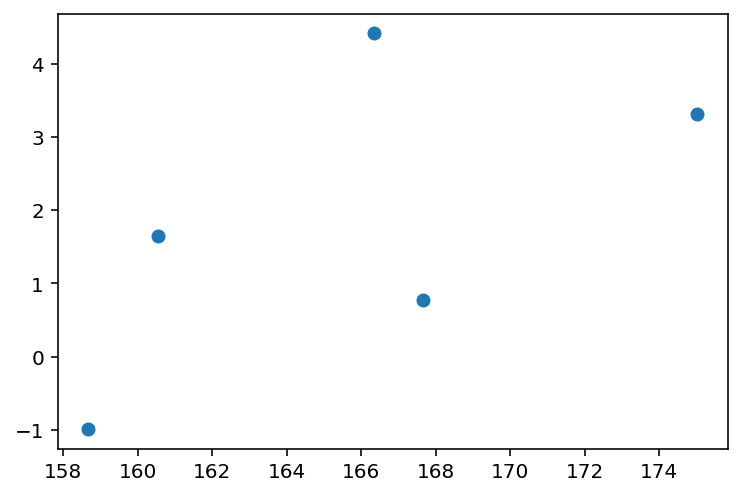

In [ ]:
x_toy_q = x_train[[6,7,12,16,21]]
y_toy_q = y_train[[6,7,12,16,21]]
plt.figure()
plt.scatter(x_toy_q, y_toy_q)

In [ ]:
# 1. non linear projection

h1 = x_toy_q
h2 = x_toy_q ** 2

# extend H
He = np.vstack((np.ones(len(h1)), h1, h2)).T

print("Extended data matrix, size {0:d} rows and {1:d} columns".format(He.shape[0], He.shape[1]))
for row in He:
    print(', '.join(map(str,np.round(row,1))))
print("")


P = np.linalg.inv(He.T.dot(He)).dot(He.T)
print("Pseudoinverse,  size {0:d} rows and {1:d} columns".format(P.shape[0], P.shape[1]))
for row in P:
    print(',  '.join(map(str,np.round(row,3))))
print("")

v = P.dot(y_toy_q)
print("Weight vector of linear regressor in H of size {0:d}".format(len(v)))
print("")
print(',  '.join(map(str,np.round(v,3))))

Extended data matrix, size 5 rows and 3 columns
1.0, 160.5, 25773.6
1.0, 166.4, 27673.3
1.0, 167.7, 28112.8
1.0, 175.0, 30630.4
1.0, 158.7, 25178.6

Pseudoinverse,  size 3 rows and 5 columns
28.158,  -217.006,  -213.502,  206.522,  196.828
-0.306,  2.605,  2.555,  -2.534,  -2.32
0.001,  -0.008,  -0.008,  0.008,  0.007

Weight vector of linear regressor in H of size 3

-586.306,  6.862,  -0.02


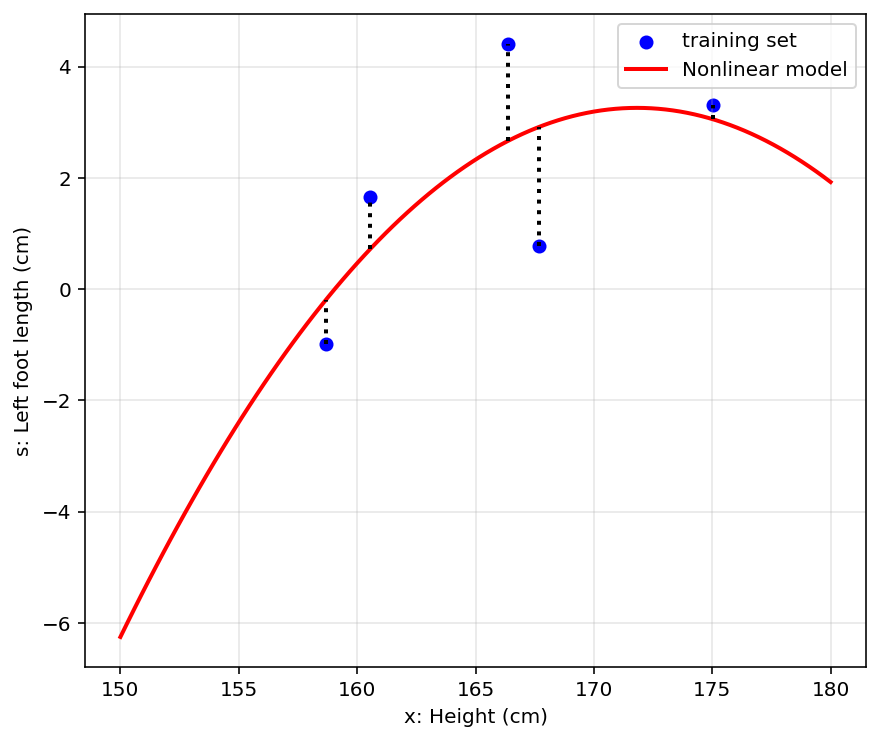

In [ ]:
plt.figure(figsize=(7,6))
plt.scatter(x_toy_q, y_toy_q, marker='o', color='blue', label='training set')
xg = np.linspace(150,180,100)
Hg = np.vstack((np.ones(len(xg)), xg, xg**2)).T
yg = Hg.dot(v)
plt.plot(xg,yg,linewidth=2,label='Nonlinear model', color='red')
plt.xlabel('x: Height (cm)')
plt.ylabel('s: Left foot length (cm)')
plt.grid(alpha=0.3)
s_ = He.dot(v)
for jj, xt in enumerate(x_toy_q):
    if s_[jj] > y_toy_q[jj]:
        y1 = y_toy_q[jj]
        y2 = s_[jj]
    else:
        y2 = y_toy_q[jj]
        y1 = s_[jj]
    plt.plot([xt,xt],[y1,y2], linestyle=':', linewidth=2, color='black')
_=plt.legend()

In [ ]:
def my_kernel(x1,x2):
    X1 = np.vstack((np.ones(len(x1)), x1, x1**2)).T
    X2 = np.vstack((np.ones(len(x2)), x2, x2**2)).T
    return X1.dot(X2.T)

In [ ]:
# 2. Using kernels

K = my_kernel(x_toy_q, x_toy_q)

print("Kernel matrix, size {0:d} rows and {1:d} columns".format(K.shape[0], K.shape[1]))
for row in K:
    print(', '.join(map(str,np.round(row,1))))
print("")

alfa = np.linalg.inv(K+0.0000021*np.eye(len(y_toy_q))).dot(y_toy_q)

print("Dual coefficients of kernel regressor size {0:d}".format(len(alfa)))
print("")
print(',  '.join(map(str,np.round(alfa,3))))


Kernel matrix, size 5 rows and 5 columns
664305609.8, 713269145.4, 724596931.0, 789483899.9, 648969075.5
713269145.4, 765841640.2, 778004364.0, 847673964.1, 696802200.1
724596931.0, 778004364.0, 790360252.0, 861136321.1, 707868463.4
789483899.9, 847673964.1, 861136321.1, 938250384.2, 771257399.8
648969075.5, 696802200.1, 707868463.4, 771257399.8, 633986612.4

Dual coefficients of kernel regressor size 5

410023.342,  906607.266,  -904519.381,  29139.107,  -441667.708


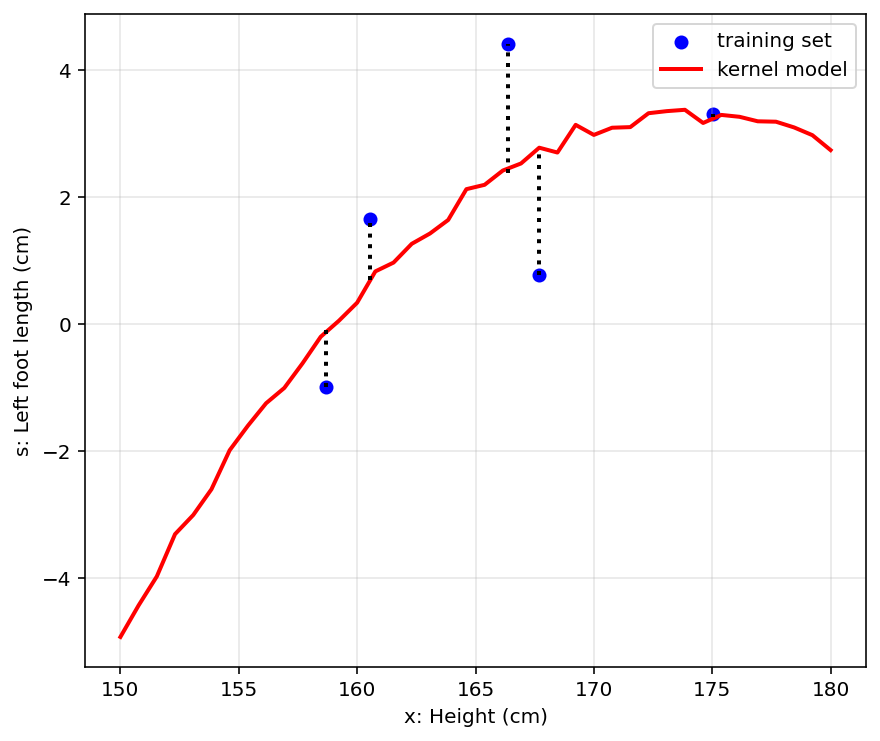

In [ ]:
plt.figure(figsize=(7,6))
plt.scatter(x_toy_q, y_toy_q, marker='o', color='blue', label='training set')
xg = np.linspace(150,180,40)
Kg = my_kernel(xg, x_toy_q)
yg = Kg.dot(alfa)
plt.plot(xg,yg,linewidth=2,label='kernel model', color='red')
plt.xlabel('x: Height (cm)')
plt.ylabel('s: Left foot length (cm)')
plt.grid(alpha=0.3)
s_ = K.dot(alfa)
for jj, xt in enumerate(x_toy_q):
    if s_[jj] > y_toy_q[jj]:
        y1 = y_toy_q[jj]
        y2 = s_[jj]
    else:
        y2 = y_toy_q[jj]
        y1 = s_[jj]
    plt.plot([xt,xt],[y1,y2], linestyle=':', linewidth=2, color='black')
_=plt.legend()

# Kernel Regression: Duality

To motivate the concept of **duality** we review the steps one needs to follow to solve a regression problem with kernel regression.

We introduce a new example with a known true latent function that generates the data so that we can completely evaluate the performance of the learnt models.

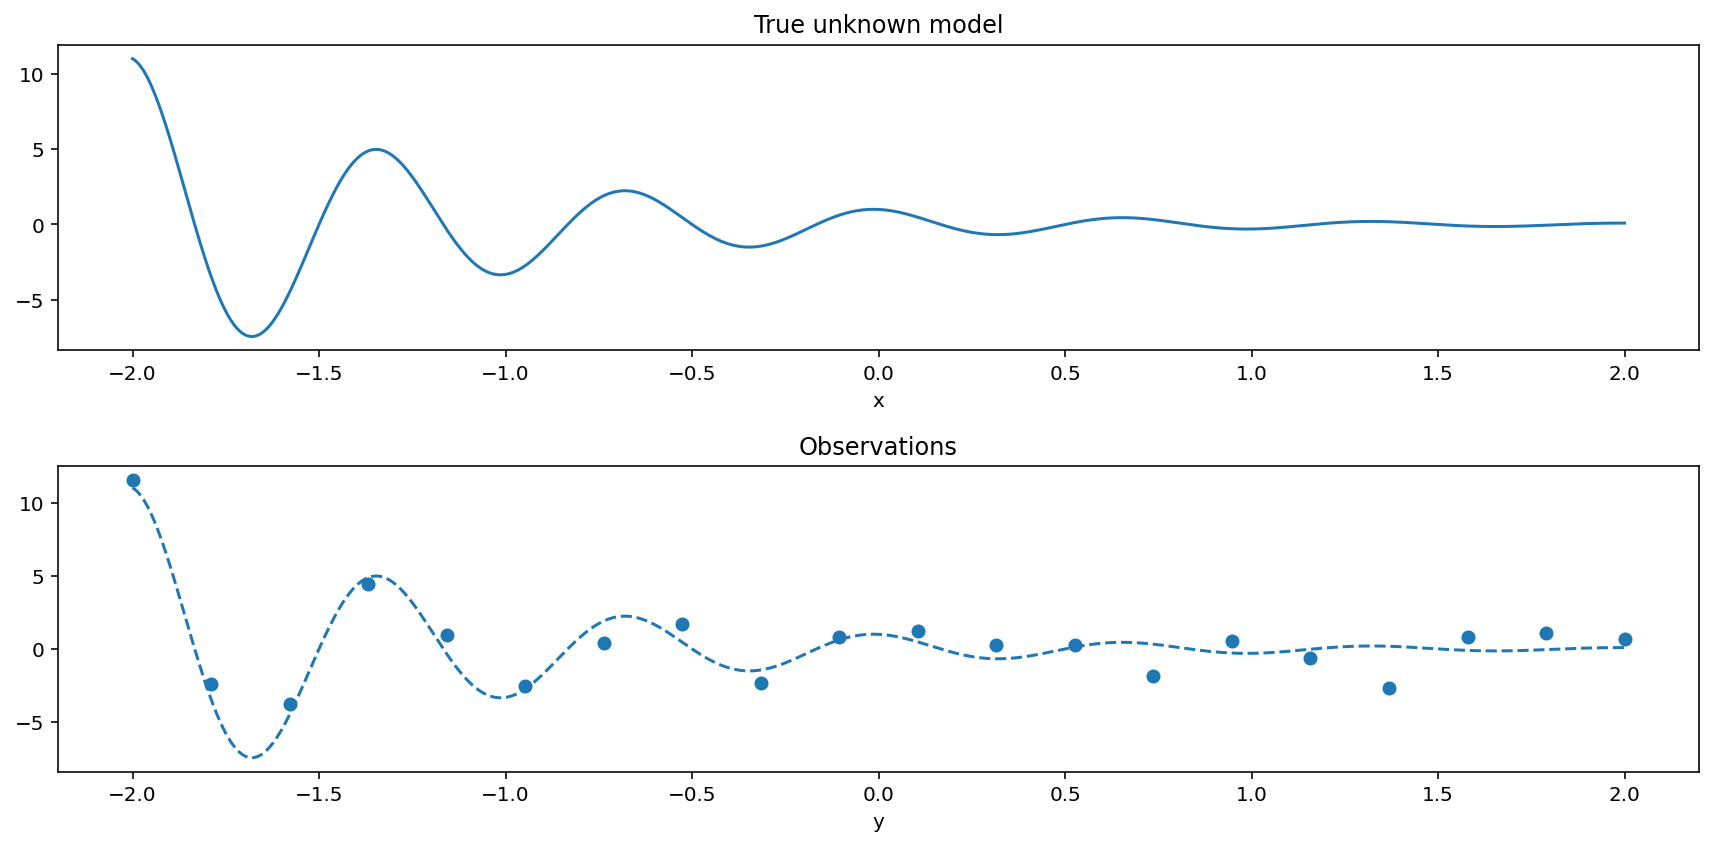

In [ ]:
import random
def ff(x, a=1.2, b=3):
  return np.exp(-a*x)*np.cos(b*np.pi*x)
a = 1.2
n=20
x = np.linspace(-2,2,n)
xg = np.linspace(-2,2,2000)
y = ff(x)
yg = ff(xg)
sigma_n = 1
y += np.array([random.gauss(mu=0, sigma=sigma_n) for ii in range(n)])
my = np.mean(y)

fa, aa = plt.subplots(2,1,figsize=(12,6))
aa[0].plot(xg,yg,label='ff(x)')
aa[0].set_xlabel('x')
aa[0].set_title('True unknown model')
aa[1].scatter(x,y)
aa[1].plot(xg,yg,linestyle='--',label='underlying ff(x)')
aa[1].set_xlabel('x')
aa[1].set_xlabel('y')
aa[1].set_title('Observations')

fa.tight_layout()

### 1. Choose a kernel function
For instance choose the RBF kernel with $\gamma=10$
$$
\kappa(x_i, x_j) = \exp(-\gamma(x_i -x_j )^2)
$$

Some of the kernels are already implemented in scikit learn... The [RBF kernel](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.rbf_kernel.html#sklearn.metrics.pairwise.rbf_kernel) for sure

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel
gamma=10
K = rbf_kernel(x.reshape(-1,1),gamma=gamma)


In [ ]:
K.shape

(20, 20)

### 2. Compute dual coefficients $\boldsymbol \beta$

We don't include the regularization term for simplicity.

In [ ]:
beta = np.linalg.inv(K).dot(y)

### 3. Compute estimations $\hat y$

In [ ]:
Kg = rbf_kernel(xg.reshape(-1,1), x.reshape(-1,1),gamma=gamma)
sg = Kg.dot(beta)

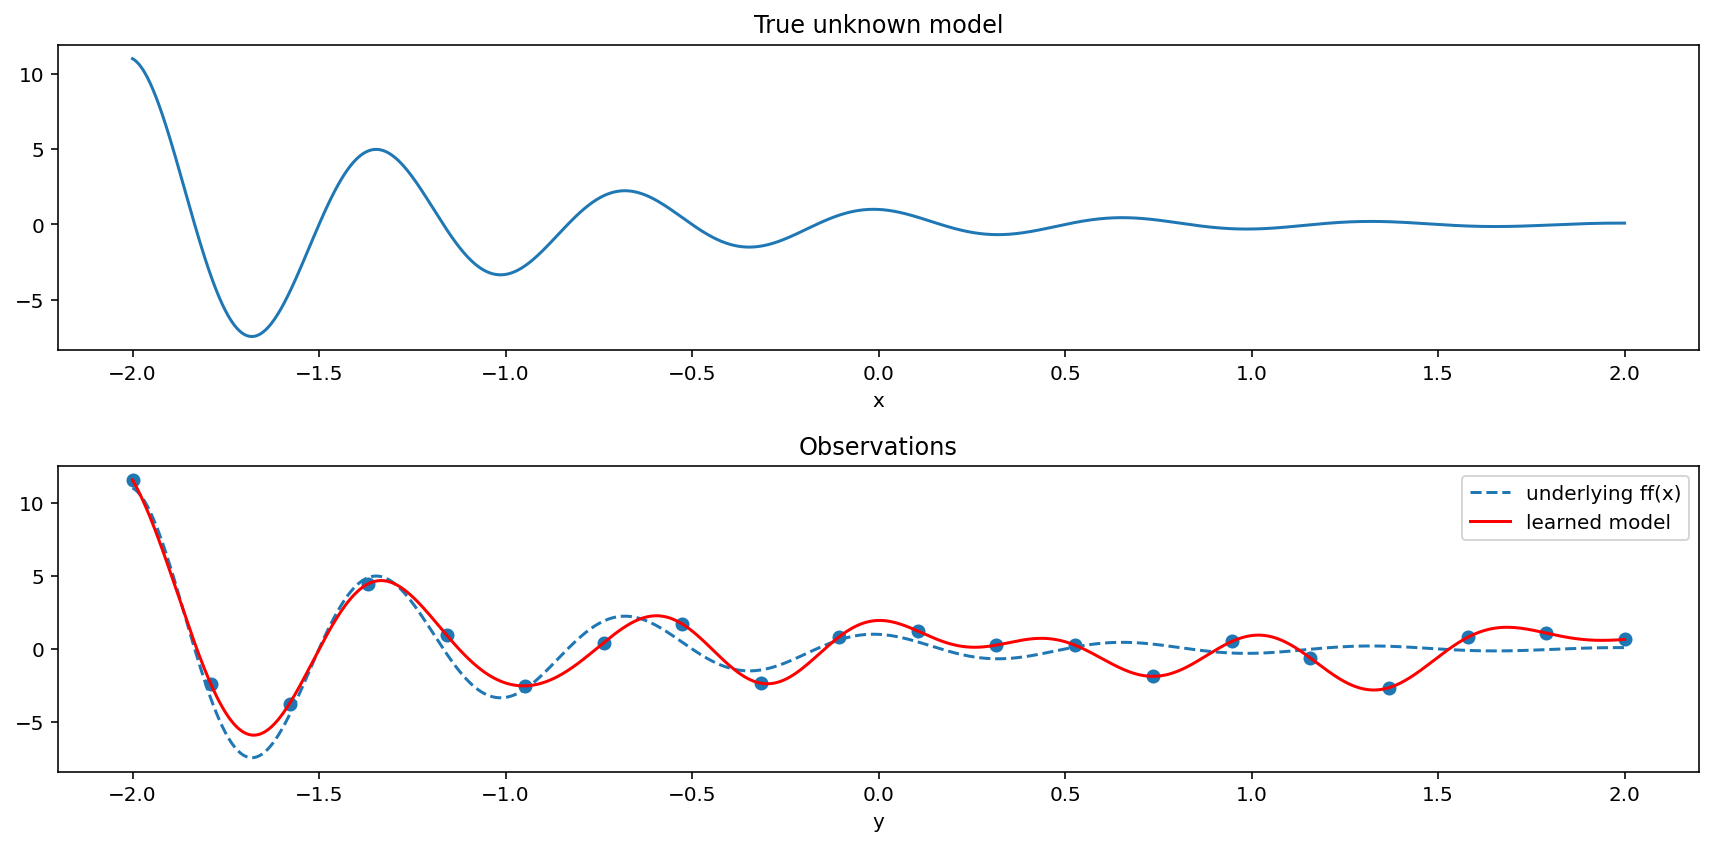

In [ ]:
fa, aa = plt.subplots(2,1,figsize=(12,6))
aa[0].plot(xg,yg,label='ff(x)')
aa[0].set_xlabel('x')
aa[0].set_title('True unknown model')
aa[1].scatter(x,y)
aa[1].plot(xg,yg,linestyle='--',label='underlying ff(x)')
aa[1].set_xlabel('x')
aa[1].set_xlabel('y')
aa[1].set_title('Observations')
aa[1].plot(xg,sg,color='red',label='learned model')
aa[1].legend()
fa.tight_layout()

## Model as a linear combination of kernel functions sitting on the observed inputs

The estimation for a single test input $x_t$ was computed as

$$
\hat y_t = \mathbf v^\top \mathbf h(x_t) = \boldsymbol \beta^\top H\mathbf h(x_t) = \boldsymbol \beta^\top \mathbf k_t
$$
where
$$
\mathbf k_t = \left[ \begin{array}{c}  \kappa(x_1, x_t) \\ \kappa(x_2, x_t)\\ \vdots \\ \kappa(x_N, x_t)\end{array} \right]
$$

It can be rewritten in scalar form by explicitly computing the scalar product between $\mathbf k_t$ and $\boldsymbol \beta$:
$$
\hat y_t =  \boldsymbol \beta^\top \mathbf k_t = \sum_{i=1}^N{\beta\kappa(x_i, x_t)}
$$

So the model can be interpreted a semilinear one in which the components are the kernels with the inputs observations 


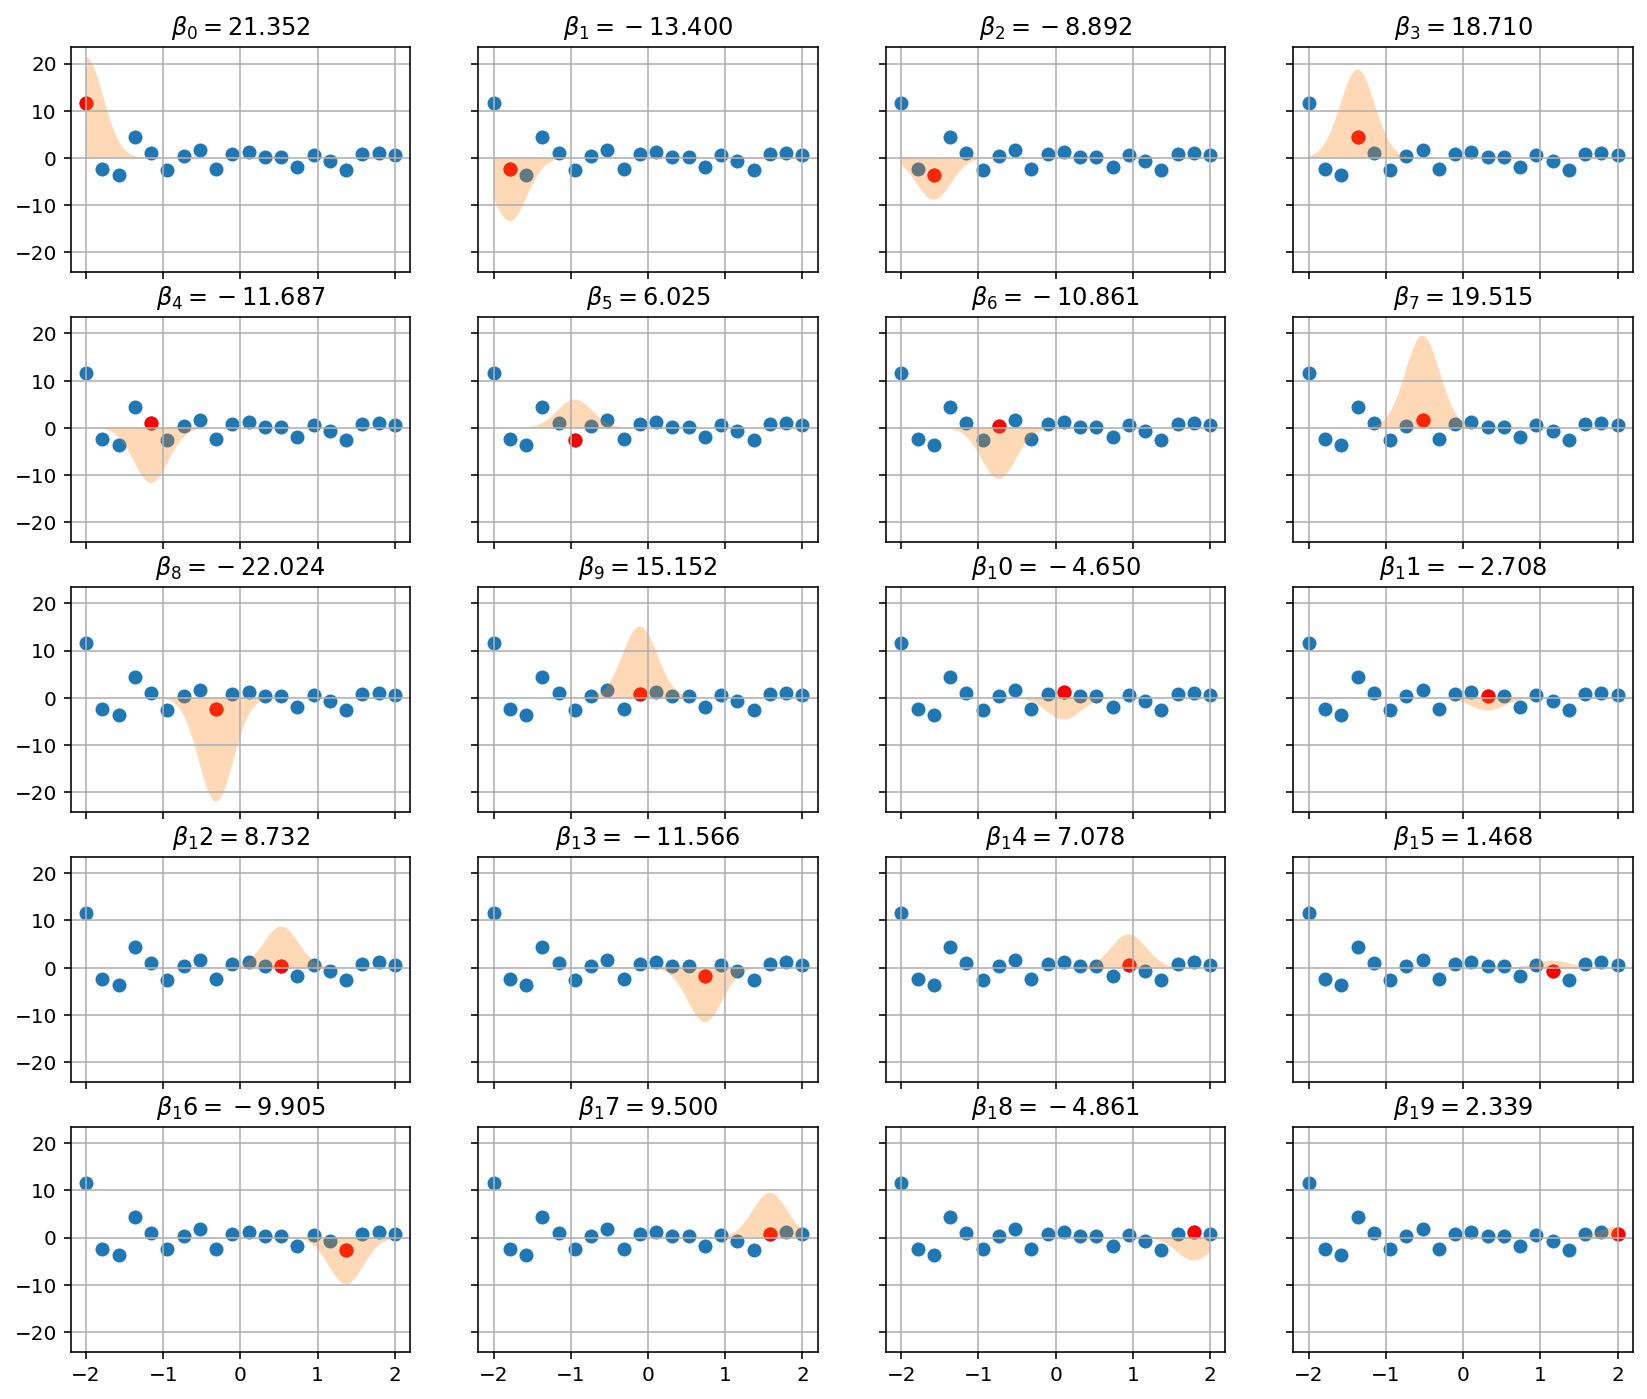

In [ ]:
%matplotlib inline
fa, aa = plt.subplots(5,4,figsize=(14,12),sharex=True, sharey=True)
kk = 0
for rr in range(5):
    for cc in range(4):
        aa[rr][cc].scatter(x,y)
        aa[rr][cc].scatter(x[kk],y[kk],color='red')
        yg = rbf_kernel(xg.reshape(-1,1), x[kk].reshape(-1,1), gamma=gamma)*beta[kk]
        aa[rr][cc].fill_between(xg,
                                np.zeros(len(yg)),
                                np.squeeze(yg),
                                alpha=0.3)
        aa[rr][cc].set_title('$\\beta_{0:d}={1:.3f}$'.format(kk,beta[kk]))
        kk += 1
        aa[rr][cc].grid()
        

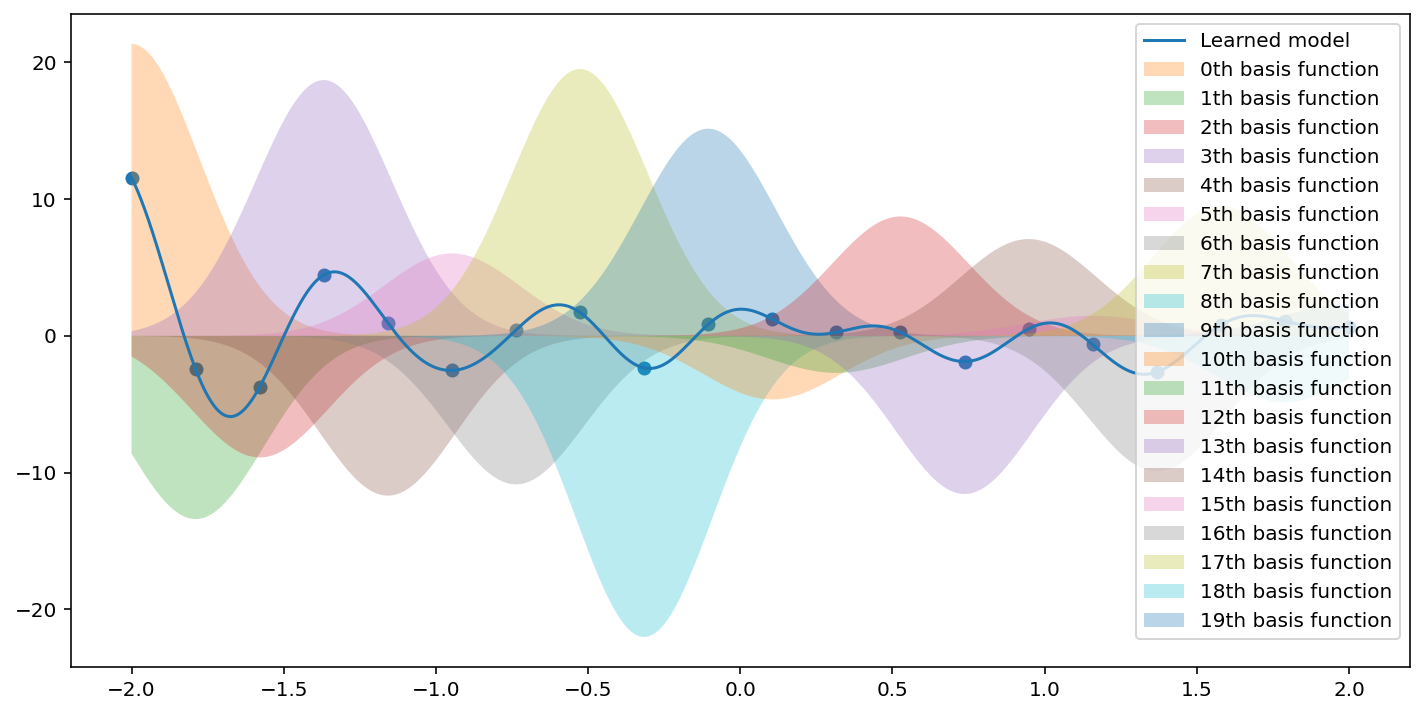

In [ ]:
plt.figure(figsize=(12,6))


plt.plot(xg,sg,label='Learned model')

plt.scatter(x,y)
for kk in range(len(x)): 
    zg = rbf_kernel(xg.reshape(-1,1), x[kk].reshape(-1,1), gamma=gamma)*beta[kk]
    plt.fill_between(xg,
                                np.zeros(len(zg)),
                            np.squeeze(zg),
                            alpha=0.3,label='{0:d}th basis function'.format(kk))
plt.legend()

# Kernel Ridge Regression with Scikit Learn

The methods that we have visited are already implemented in [scikit learn](https://scikit-learn.org/stable/index.html), the poweful machine learning toolbox for python that we will be using in the machine learning part of the course.

Particularly these are the implementations:

| Model | Module |
|:------ | :--- |
| Linear Regression (also multivariate) | [`LinearRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)|
| Regularized Linear Regression | [`Ridge()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)|
| Kernel regularized Linear Regression | [`KernelRidge()`](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html)|

The scikit learn machine learning implementations have three main methods to deploy the models:
- `fit`: to learn the free parameters of the model, like the weights in the linear regression case
- `predict`: to do inference with a test set
- `score`: to evaluate the performance of the model in a test set with available true targets

In [ ]:
a = 1.2
n=20
x = np.linspace(-2,2,n)
xg = np.linspace(-2,2,2000)
y = ff(x)
yg = ff(xg)
sigma_n = 1
y += np.array([random.gauss(mu=0, sigma=sigma_n) for ii in range(n)])
my = np.mean(y)

 Solve the problem with kernel ridge. Set the regularization parameter `alpha=0` and use a value of `gamma=20` for the RBF kernel

In [ ]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error


In [ ]:
KR = KernelRidge(kernel='rbf',
                alpha=0,
                gamma=20)

In [ ]:
KR.fit(x.reshape(-1,1),y)

KernelRidge(alpha=0, gamma=20, kernel='rbf')

In [ ]:
LR = LinearRegression().fit(x.reshape(-1,1),y)

In [ ]:
y_pred = KR.predict(xg.reshape(-1,1))
print("R^2 score {0:.3f}".format(KR.score(xg.reshape(-1,1), ff(xg))))
print("MSE {0:.3f}".format(mean_squared_error(y_pred,  ff(xg))))


R^2 score 0.904
MSE 0.618


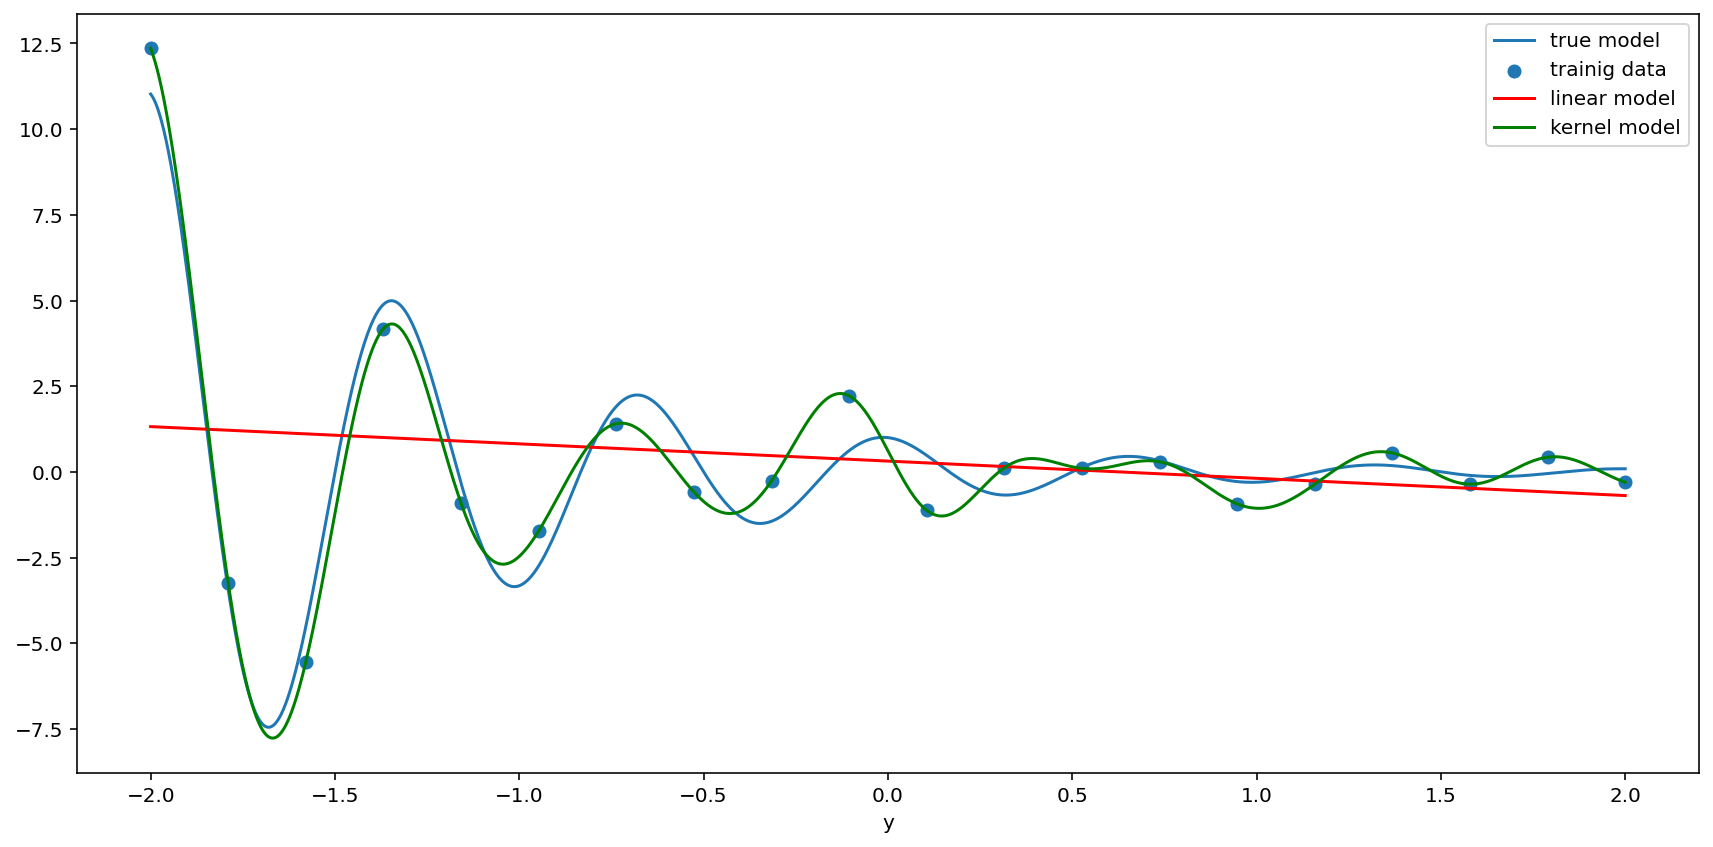

In [ ]:
fa, aa = plt.subplots(1,1,figsize=(12,6))
aa.plot(xg,yg,label='true model')
aa.set_xlabel('x')
aa.scatter(x,y, label='trainig data')
aa.set_xlabel('y')
aa.plot(xg,LR.predict(xg.reshape(-1,1)),color='red',label='linear model')
aa.plot(xg,KR.predict(xg.reshape(-1,1)),color='green',label='kernel model')

aa.legend()
fa.tight_layout()

## Role of $\gamma$

Remember $\gamma$ controls the spread of the kernel function, the larger the value of $\gamma$, the narrower the kernel and the rougher the approximation function. Observe the kernel regression for different values of $\gamma$ 

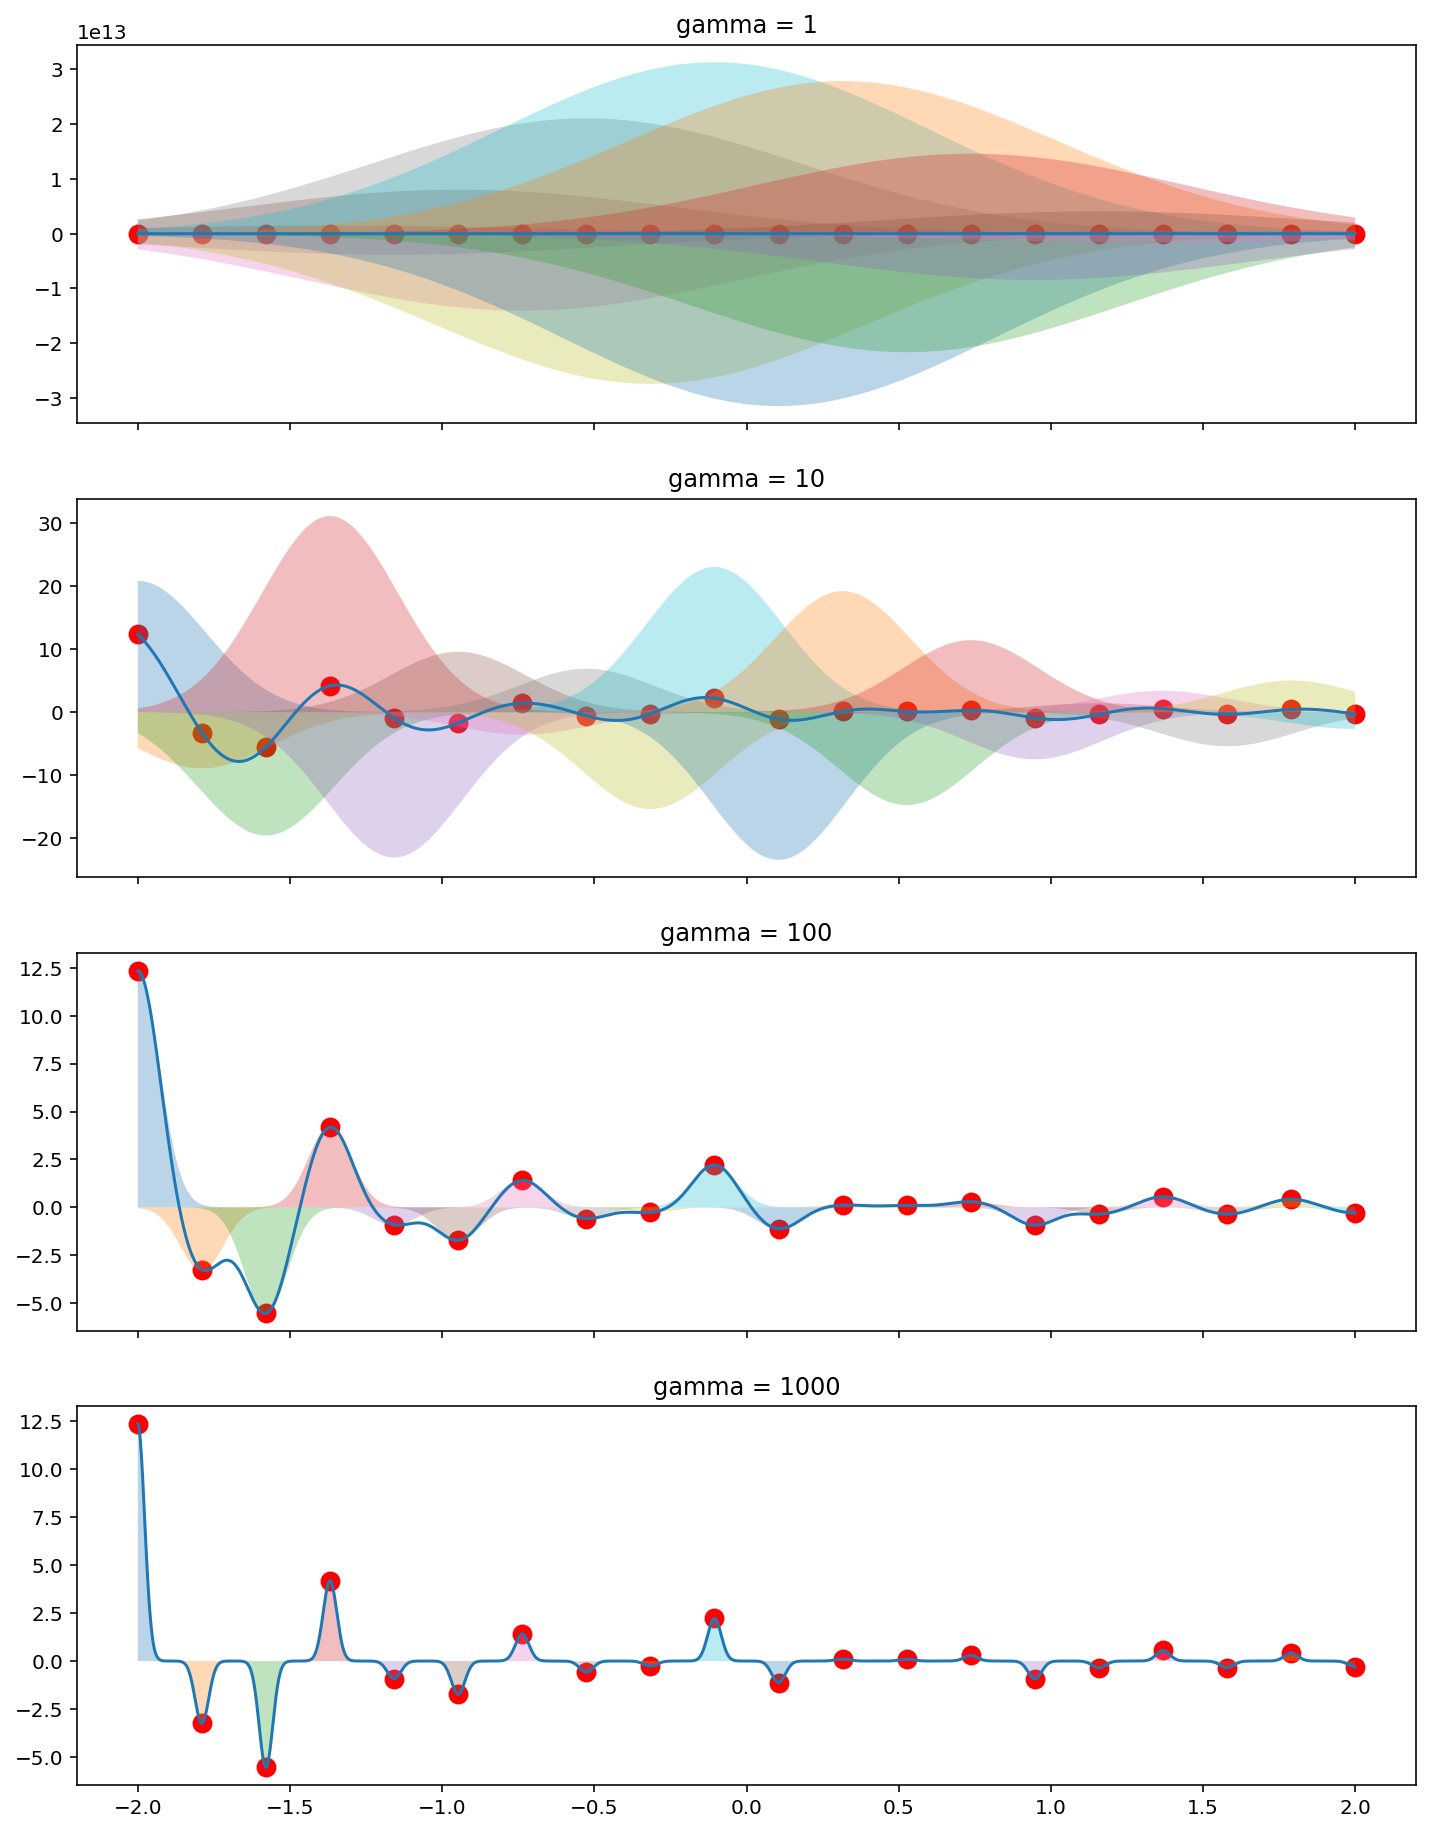

In [ ]:
v_gamma = [1,10,100,1000]
ff,aa = plt.subplots(len(v_gamma),1,figsize=(12,4*len(v_gamma)),sharex=True)
for ig, gg in enumerate(v_gamma):
    KR = KernelRidge(kernel='rbf',
                     gamma=gg,
                    alpha=0).fit(x.reshape(-1,1),
                                y)
    sg = KR.predict(xg.reshape(-1,1))
    aa[ig].plot(xg,sg,label='Learned model')
    aa[ig].scatter(x,y,color='red',s=80)
    aa[ig].set_title('gamma = {0:.0f}'.format(gg))
    for kk in range(len(x)): 
        zg = rbf_kernel(xg.reshape(-1,1), x[kk].reshape(-1,1), gamma=gg)*KR.dual_coef_[kk]
        aa[ig].fill_between(xg,
                                np.zeros(len(zg)),
                            np.squeeze(zg),
                            alpha=0.3)








































































## Regularization

The kernel regression can also benefit from regularization. The optimization in feature space introducing a regularization term is:
$$
\min_{\mathbf v} \frac{1}{N} \left(\mathbf y - H \mathbf v \right)^\top \left(\mathbf y - H \mathbf v \right) + \alpha \mathbf v^\top\mathbf v  
$$where $H$ is the data matrix in feature space and $\mathbf v$ is the weight vector in feature space.

Now we express $\mathbf v$ as a linear combination of the mapped inputs in $\mathcal H$

$$
\mathbf v = H^\top\boldsymbol \beta
$$ where $\boldsymbol \beta$ is a vector with the $N$ coefficients of this linear combination. The optimization then becomes

$$
\min_{\boldsymbol \beta} \frac{1}{N} \left(\mathbf y - H H^\top\boldsymbol \beta \right)^\top \left(\mathbf y - H H^\top\boldsymbol \beta \right) + \alpha \boldsymbol \beta^\top H H^\top\boldsymbol \beta
$$

Introduce now the kernel matrix $K=HH^\top$

$$
\min_{\boldsymbol \beta} \frac{1}{N} \left(\mathbf y - K\boldsymbol \beta \right)^\top \left(\mathbf y - K\boldsymbol \beta \right) + \alpha \boldsymbol \beta^\top K\boldsymbol \beta
$$

$$
=\min_{\boldsymbol \beta} \frac{1}{N} \left(\mathbf y^\top \mathbf y - 2\boldsymbol \beta^\top K\mathbf y + \boldsymbol \beta^\top K^2\boldsymbol \beta \right) + \alpha \boldsymbol \beta^\top K\boldsymbol \beta
$$

Taking gradients with respect to $\boldsymbol \beta$ and making them equal to $\mathbf 0$ will give you the optimum 
$\boldsymbol \beta$:

$$
\frac{1}{N} \left(-2K\mathbf y + 2K^2\boldsymbol \beta \right) + 2\alpha K\boldsymbol \beta = \mathbf 0
$$
Resulting in 
$$
\boldsymbol \beta = (K + \alpha N \mathbb I)^{-1}\mathbf y
$$

Notice how this regularization solves the issue of $K$ being invertible.


### Regularize with $\alpha = 0.01$

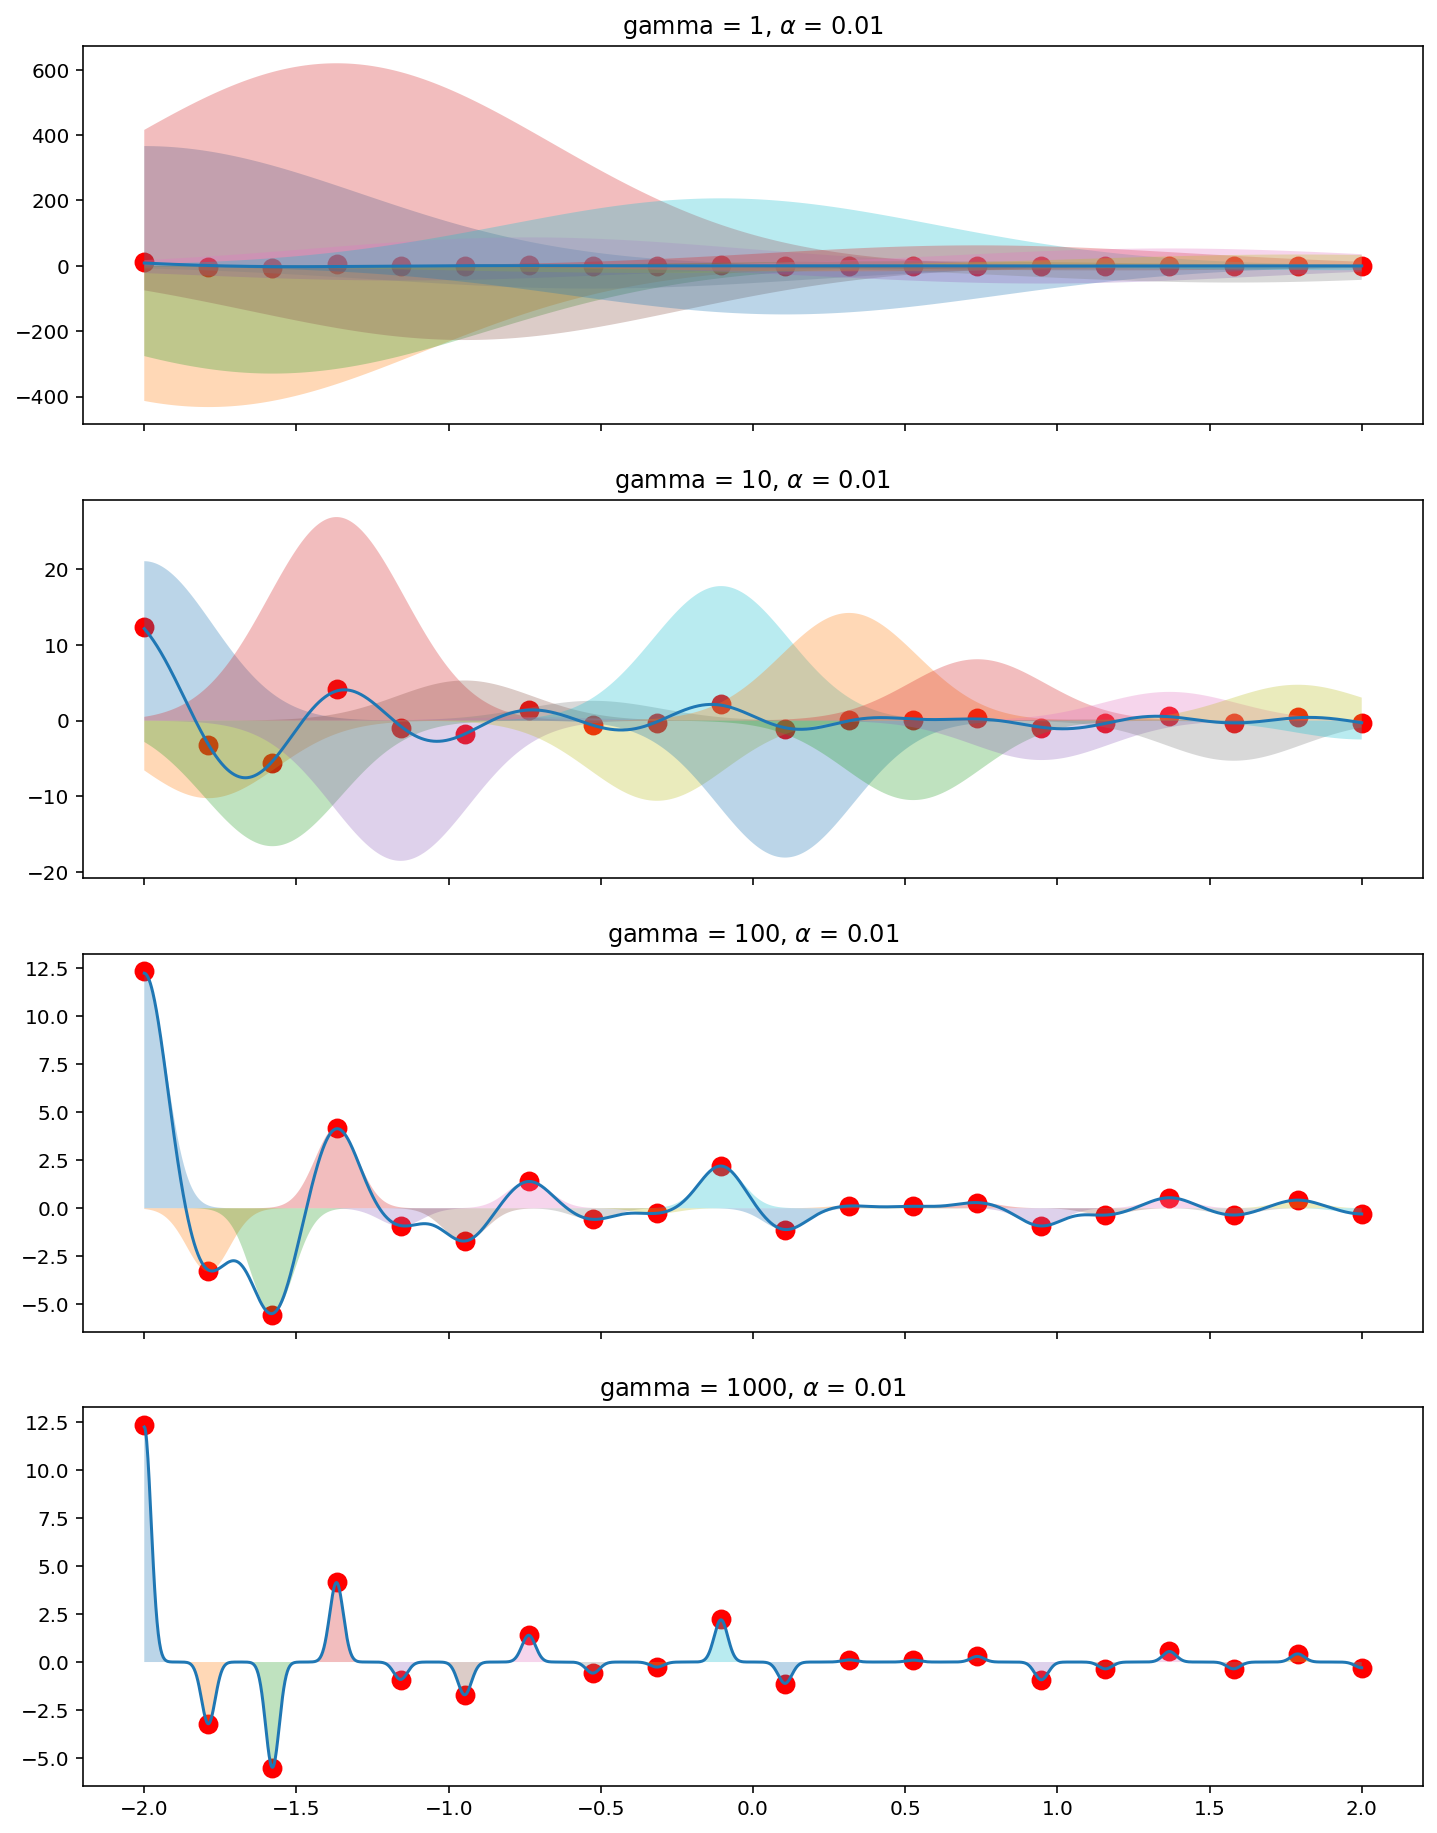

In [ ]:




ll = .01
n = len(y)
v_gamma = [1,10,100,1000]
ff,aa = plt.subplots(len(v_gamma),1,figsize=(12,4*len(v_gamma)),sharex=True)
for ig, gg in enumerate(v_gamma):
    KR = KernelRidge(kernel='rbf',
                     gamma=gg,
                    alpha=ll).fit(x.reshape(-1,1),
                                y)
    sg = KR.predict(xg.reshape(-1,1))
    aa[ig].plot(xg,sg,label='Learned model')
    aa[ig].scatter(x,y,color='red',s=80)
    aa[ig].set_title('gamma = {0:.0f}, $\\alpha$ = {1:.2f}'.format(gg,ll))
    for kk in range(len(x)): 
        zg = rbf_kernel(xg.reshape(-1,1), x[kk].reshape(-1,1), gamma=gg)*KR.dual_coef_[kk]
        aa[ig].fill_between(xg,
                                np.zeros(len(zg)),
                            np.squeeze(zg),
                            alpha=0.3)

### Regularize with $\alpha = 0.1$

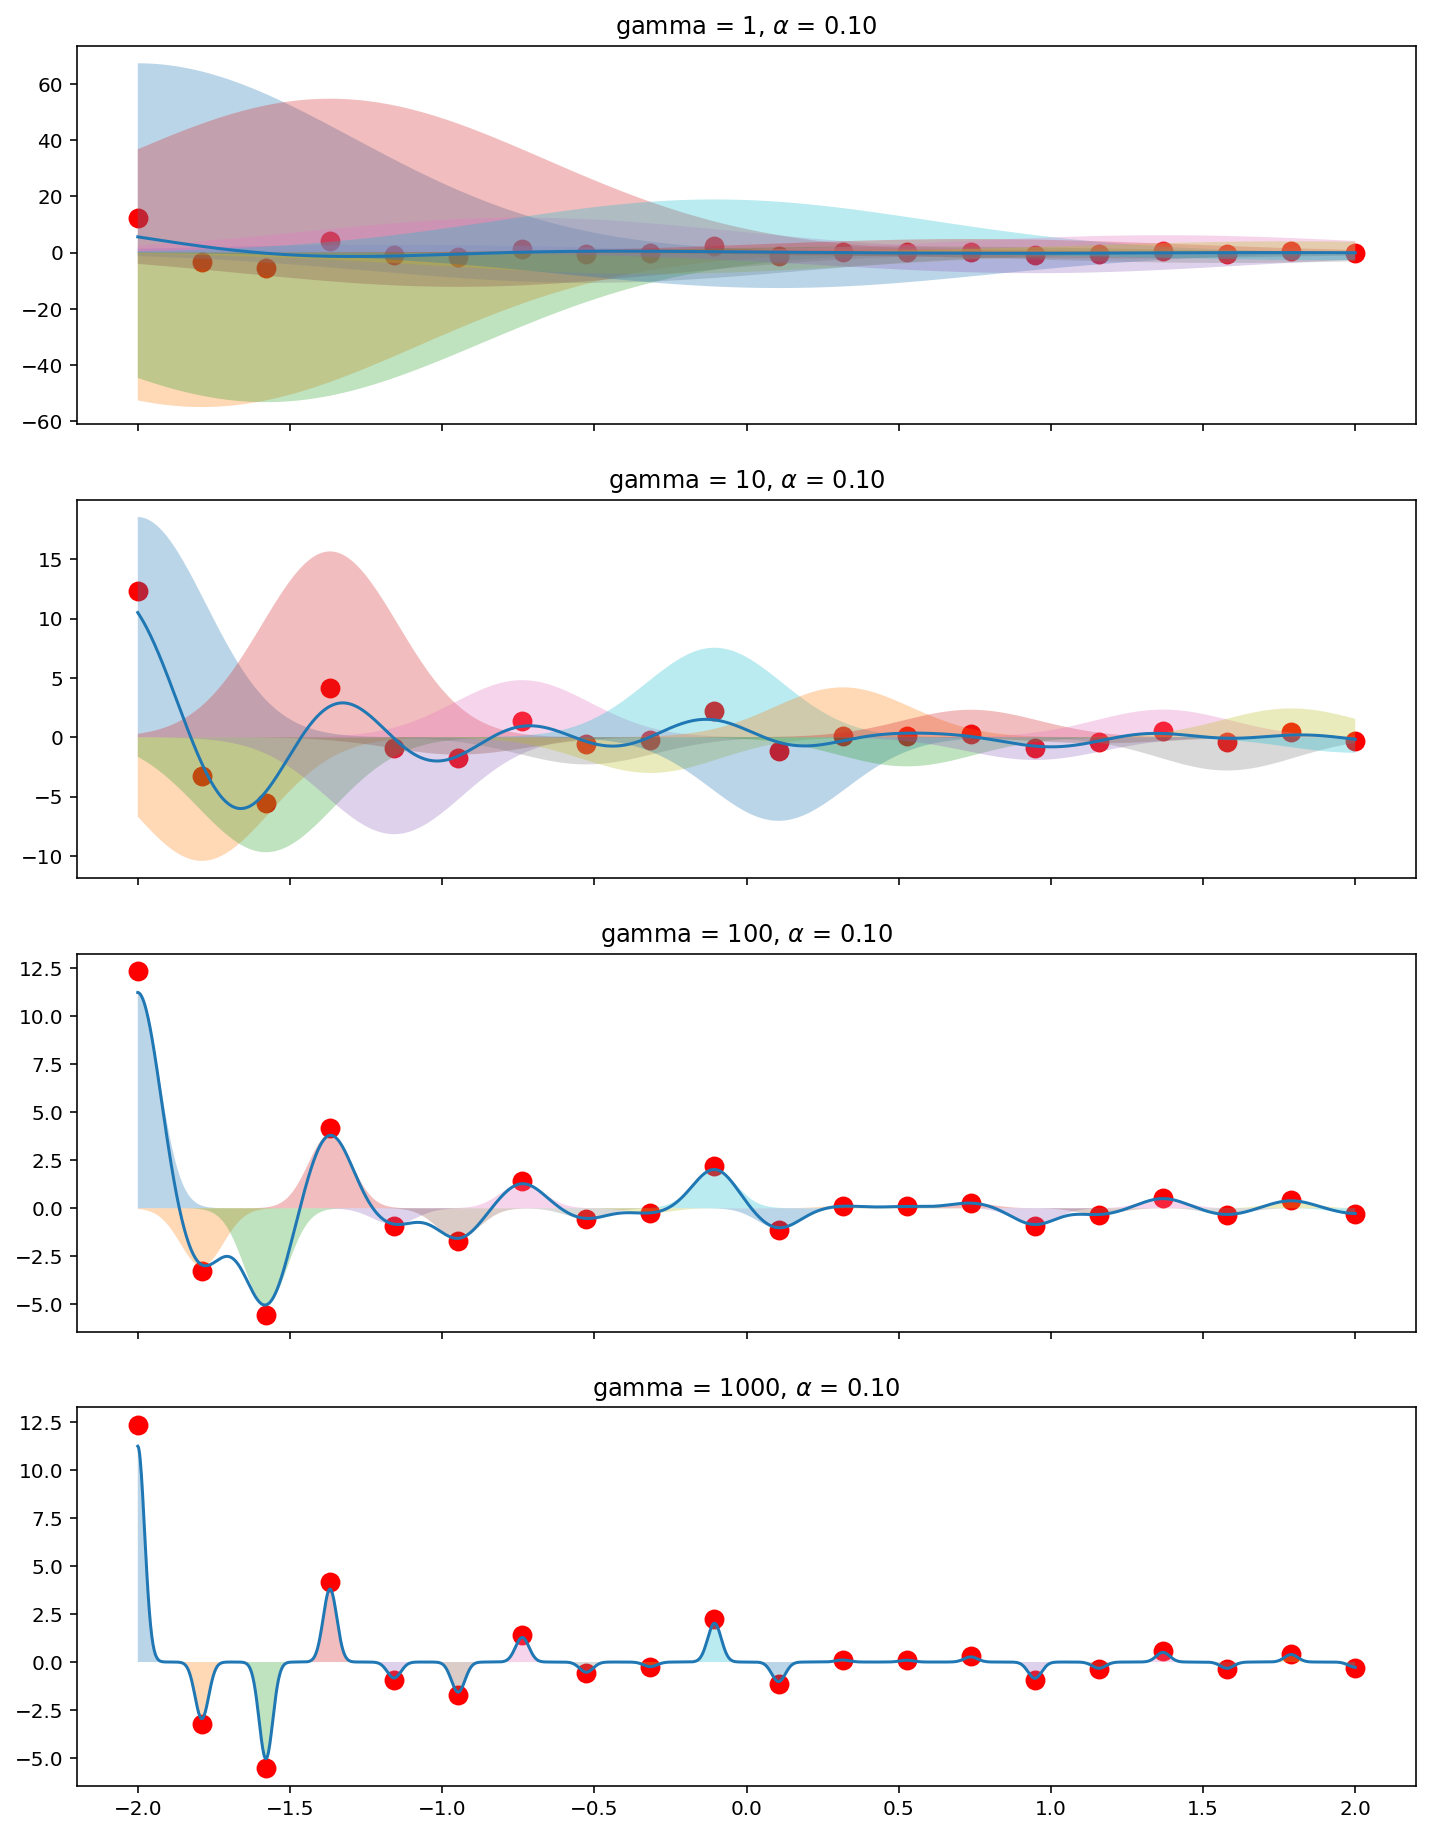

In [ ]:
ll = .1
n = len(y)
v_gamma = [1,10,100,1000]
ff,aa = plt.subplots(len(v_gamma),1,figsize=(12,4*len(v_gamma)),sharex=True)
for ig, gg in enumerate(v_gamma):
    KR = KernelRidge(kernel='rbf',
                     gamma=gg,
                    alpha=ll).fit(x.reshape(-1,1),
                                y)
    sg = KR.predict(xg.reshape(-1,1))
    aa[ig].plot(xg,sg,label='Learned model')
    aa[ig].scatter(x,y,color='red',s=80)
    aa[ig].set_title('gamma = {0:.0f}, $\\alpha$ = {1:.2f}'.format(gg,ll))
    for kk in range(len(x)): 
        zg = rbf_kernel(xg.reshape(-1,1), x[kk].reshape(-1,1), gamma=gg)*KR.dual_coef_[kk]
        aa[ig].fill_between(xg,
                                np.zeros(len(zg)),
                            np.squeeze(zg),
                            alpha=0.3)

### Regularize with $\alpha = 1$

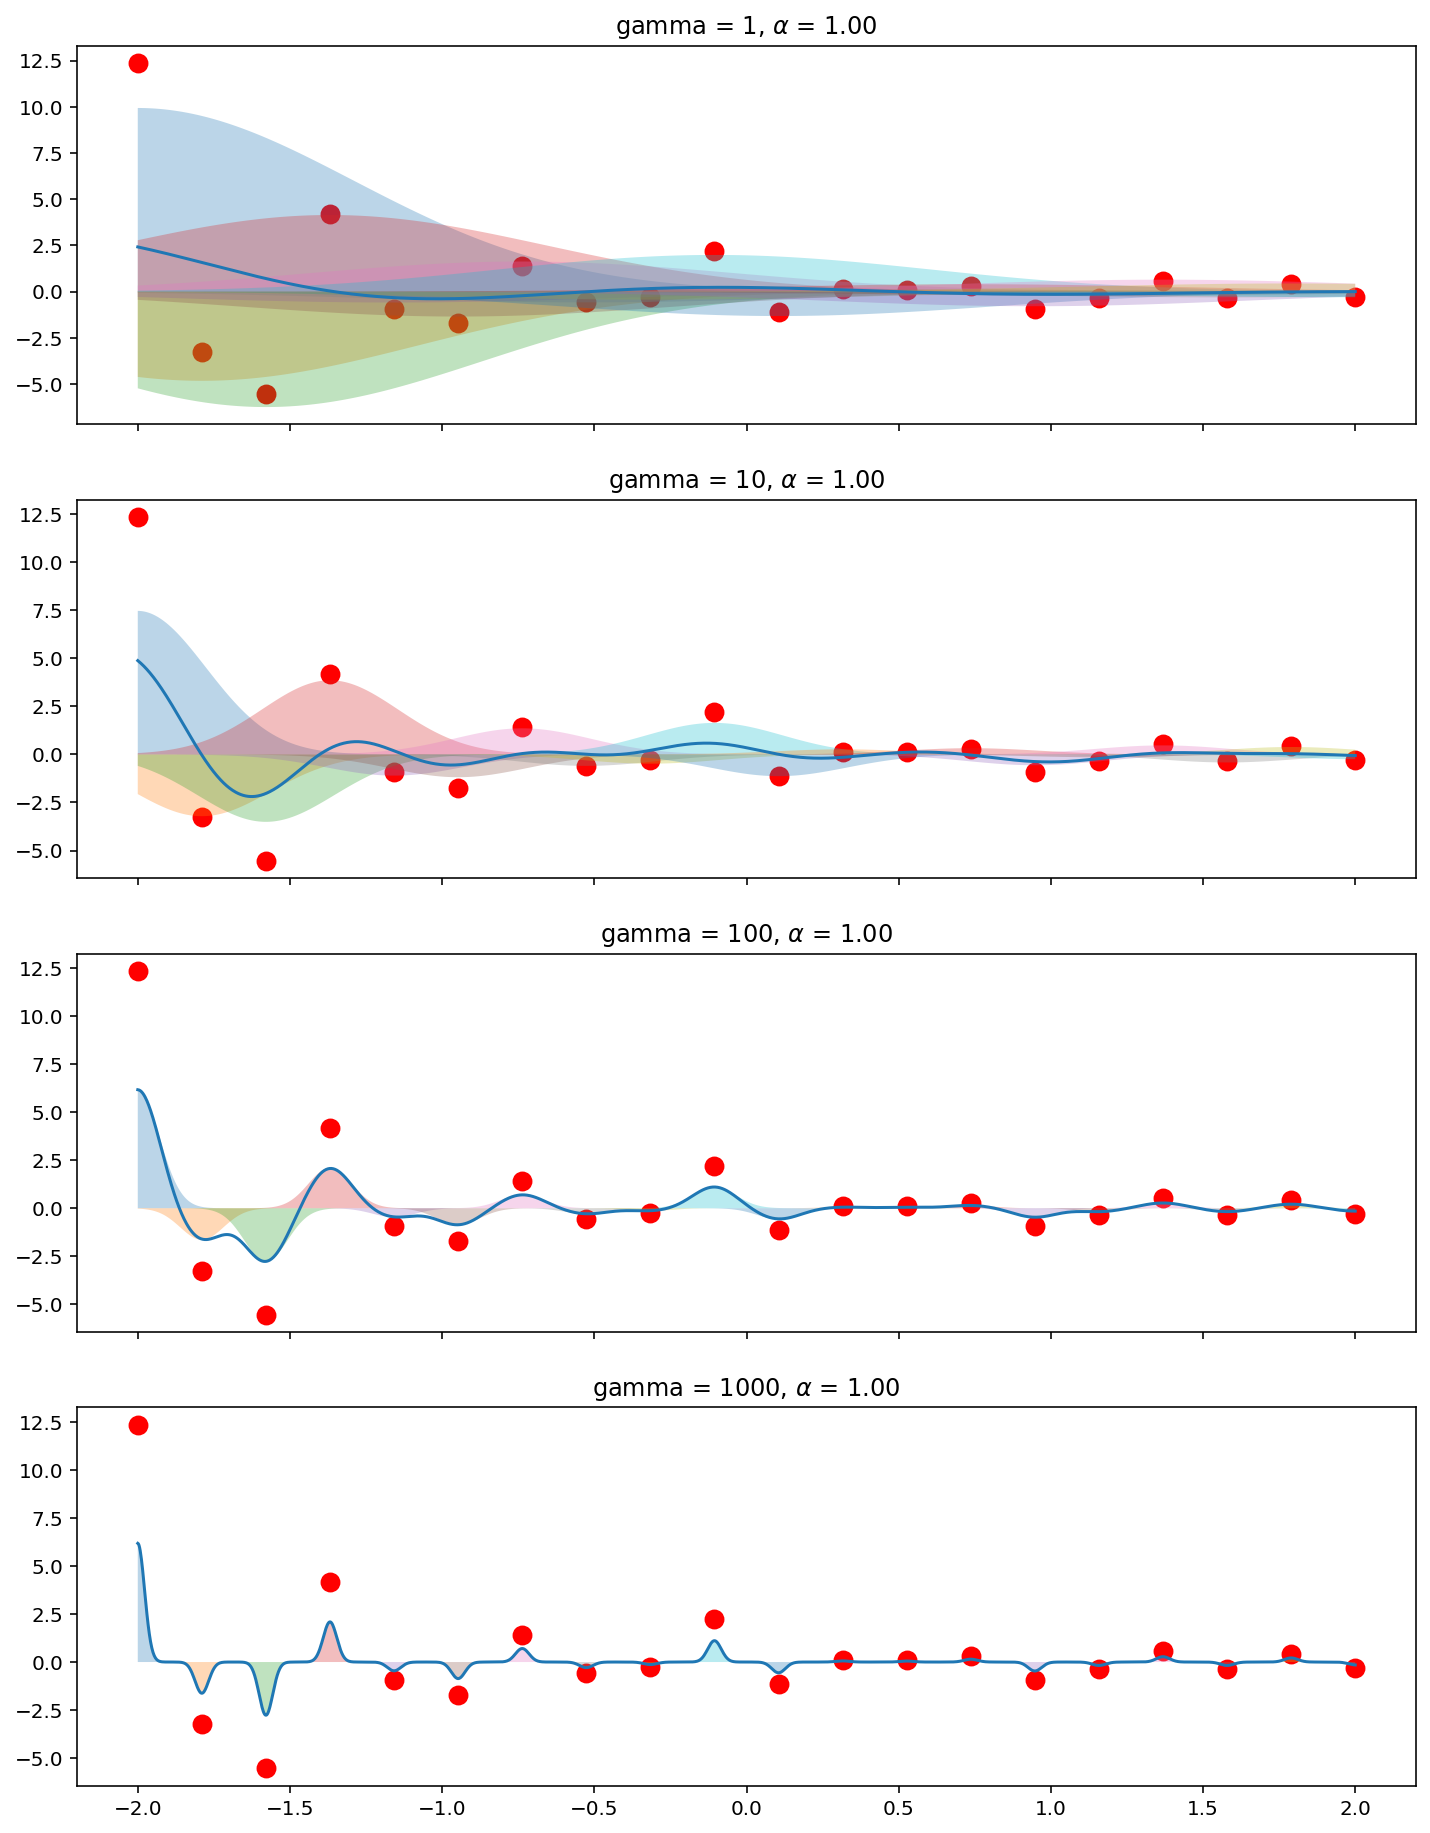

In [ ]:
ll = 1
n = len(y)
v_gamma = [1,10,100,1000]
ff,aa = plt.subplots(len(v_gamma),1,figsize=(12,4*len(v_gamma)),sharex=True)
for ig, gg in enumerate(v_gamma):
    KR = KernelRidge(kernel='rbf',
                     gamma=gg,
                    alpha=ll).fit(x.reshape(-1,1),
                                y)
    sg = KR.predict(xg.reshape(-1,1))
    aa[ig].plot(xg,sg,label='Learned model')
    aa[ig].scatter(x,y,color='red',s=80)
    aa[ig].set_title('gamma = {0:.0f}, $\\alpha$ = {1:.2f}'.format(gg,ll))
    for kk in range(len(x)): 
        zg = rbf_kernel(xg.reshape(-1,1), x[kk].reshape(-1,1), gamma=gg)*KR.dual_coef_[kk]
        aa[ig].fill_between(xg,
                                np.zeros(len(zg)),
                            np.squeeze(zg),
                            alpha=0.3)